Predicción de Diabetes con regresión logística


Pasos de este estudio

    Carga de datos
    Desarrollo



1. Carga de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/diabetes2.xls')

In [ ]:
train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1




Variables de interes:

    BMI: índice de masa corporal. Es una métrica o KPI basada en el peso y la altura de cada persona. Un BMI muy alto puede ser indicativo de tener diabetes
    Outcome: si la persona tiene diabetes o no




2. Desarrollo

En esta parte nos interesa explorar los datos y explicar el modelo de regresión logística a este caso de diabetes
2.1 Exploración de datos

Miramos una tabla y una gráfica de los datos que nos interesan


In [ ]:
train[['BMI','Outcome']].head()

,BMI,Outcome
0,33.6,1
1,26.6,0
2,23.3,1
3,28.1,0
4,43.1,1


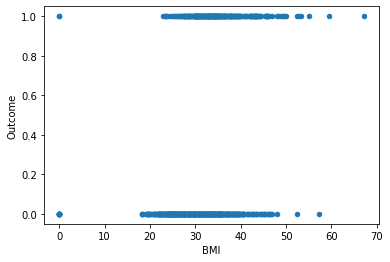

In [ ]:
train[['BMI','Outcome']].plot.scatter(x='BMI',y='Outcome')


2.2 Función logística

Vamos a pintar una función logistica sobre estos 
datos

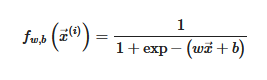

Vamos a variar *w,b* a ver que pasa en los datos

In [ ]:
# pruebas de parametro
w = 0.09
b = -3.6

In [ ]:
# despues de hacer el modelos (se explica más adelante)
# intercepto (b): [-3.68596089]
# pendiente (w): [[0.09351691]]

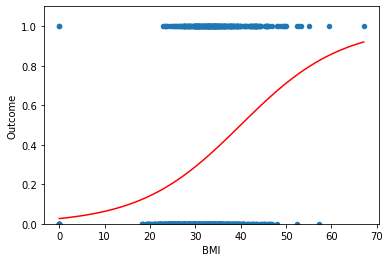

In [ ]:
# puntos de la recta
x = np.linspace(0,train['BMI'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
train.plot.scatter(x='BMI',y='Outcome')
plt.plot(x, y, '-r')
plt.ylim(0,train['Outcome'].max()*1.1)
# plt.grid()
plt.show()


2.3 Optimización de parámetros

Si escogemos esos parametros *w,b* para el modelo, ¿Qué tan buenos son?

Podemos utilizar la siguiente estrategia:

    calcular el valor de la función logística para cada dato
    calcular la función de pérdida (se denota con L o loss)
    calcular el promedio de la pérdida para obtener el costo (se denota con Jo cost)

Queremos los valores *w,b* que resulten en un menor costo

Las ecuaciones para las funciones son

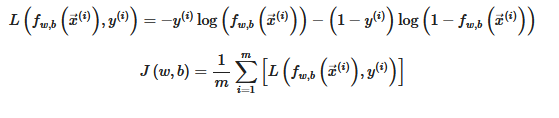

In [ ]:


# calculo de las predicciones
train['sigmoid'] = 1/(1+np.exp(-(train['BMI']*w+b)))

# calculo de la funcion de error
train['loss_xi'] = -train['Outcome']*np.log(train['sigmoid'])-(1-train['Outcome'])*np.log(1-train['sigmoid'])
cost_j = train['loss_xi'].mean()
cost_j



0.5995794663996212

Esto lo hemos hecho con los parametros que hemos obtenido a ojo por ciento. Ahora vamos a ser más refinados y calcularlo para muchos parametros a la vez y luego de ahi mirar el que tenga menor costo.

Para eso hacemos lo siguiente:

* Construimos un dataframe con valores para *w,b* que varían sobre una cuadricula o grid

* Creamos una función de python que calcule el costo *j* dados parametros *w,b*

* Aplicamos la función sobre el dataframe con los valores *w,b* en la cuadricula

* Podemos ordenar la tabla resultante para obtener los valores *w,b* con el menor costo
* Luego hacemos gráficas para verificar el resultado

In [ ]:
# hacemos dataframe para calcular el error en funcion de los parametros w, b

In [ ]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [ ]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [ ]:
def sum_error_df(df):
    train['sigmoid'] = 1/(1+np.exp(-(train['BMI']*df['w']+df['b'])))
    train['loss_xi'] = -train['Outcome']*np.log(train['sigmoid'])-(1-train['Outcome'])*np.log(1-train['sigmoid'])
    j_cost = train['loss_xi'].mean()
    return(j_cost)

In [ ]:
df['error'] = df.apply(sum_error_df, axis=1)

In [ ]:
df.sort_values(by=['error']).head()

,w,b,error
443,0.09,-3.57,0.599480
444,0.09,-3.56,0.599488
442,0.09,-3.58,0.599492
445,0.09,-3.55,0.599517
441,0.09,-3.59,0.599526


In [ ]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [ ]:
df_3d.head()

b,-4.00,-3.99,-3.98,-3.97,-3.96,-3.95,-3.94,-3.93,-3.92,-3.91,...,-3.10,-3.09,-3.08,-3.07,-3.06,-3.05,-3.04,-3.03,-3.02,-3.01
w,,,,,,,,,,,,,,,,,,,,,
0.05,0.875352,0.872746,0.870148,0.867558,0.864975,0.862401,0.859836,0.857278,0.854729,0.852189,...,0.681225,0.679636,0.678062,0.676503,0.674959,0.673431,0.671918,0.670420,0.668939,0.667473
0.06,0.788631,0.786338,0.784055,0.781783,0.779521,0.777270,0.775029,0.772800,0.770580,0.768372,...,0.633117,0.632082,0.631066,0.630067,0.629086,0.628124,0.627180,0.626254,0.625346,0.624457
0.07,0.714738,0.712845,0.710964,0.709097,0.707243,0.705403,0.703575,0.701761,0.699960,0.698173,...,0.606011,0.605615,0.605240,0.604886,0.604551,0.604238,0.603944,0.603672,0.603420,0.603188
0.08,0.656845,0.655442,0.654055,0.652683,0.651327,0.649988,0.648664,0.647356,0.646064,0.644788,...,0.602264,0.602568,0.602895,0.603243,0.603614,0.604006,0.604421,0.604857,0.605316,0.605797
0.09,0.617971,0.617142,0.616332,0.615539,0.614765,0.614009,0.613271,0.612551,0.611850,0.611168,...,0.623113,0.624146,0.625202,0.626280,0.627381,0.628504,0.629650,0.630819,0.632010,0.633224


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

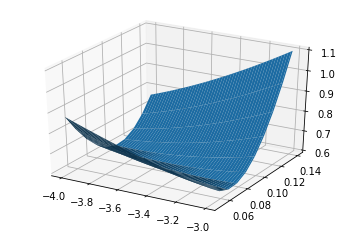

In [ ]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

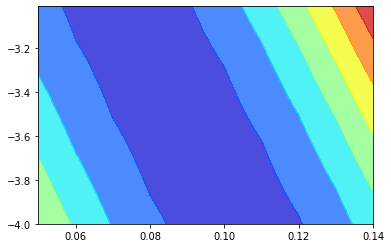

In [ ]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)

